In [15]:
from pssm_parser import parse_pssm_tsv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

Matplotlib created a temporary cache directory at /tmp/matplotlib-t1af6upu because the default path (/home/lfi/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [20]:
pssms_ProstT5 = parse_pssm_tsv(
    "/home/lfi/mnt/dev/prot-pssm/tmp/data/pssm_generated/prot-md-pssm_ProstT5_2025-04-16-19-42-11_temp-320_repl-all.tsv"
)

In [21]:
pssms_ProtT5 = parse_pssm_tsv(
    "/home/lfi/mnt/dev/prot-pssm/tmp/data/pssm_generated/prot-md-pssm_prot_t5_xl_uniref50_2025-04-16-19-37-14_temp-all_repl-0.tsv"
)

In [22]:
with open("/home/lfi/mnt/dev/prot-pssm/tmp/data/scope40/scope40_sequences_3Di.fasta") as f:
    scope40_sequences = {}
    for line in f.readlines():
        if line.startswith(">"):
            name = line.strip()[1:]  # Remove '>' and whitespace
            scope40_sequences[name] = ""
        else:
            scope40_sequences[name] += line.strip()

In [71]:
AA_ALPHABET = ["A", "C", "D", "E", "F", "G", "H", "I", "K", "L", "M", "N", "P", "Q", "R", "S", "T", "V", "W", "Y"]
STRUCTURE_ALPHABET = [x.lower() for x in AA_ALPHABET]


def plot_pssm(pssm, original_sequence=None, prost_values=None):
    plt.figure(figsize=(15, 7))
    sns.heatmap(
        pssm.T,
        cmap="viridis",
        vmin=0,
        vmax=1,
        cbar_kws={"label": "Probability"},
        linewidths=0.5,
        linecolor="black",
    )
    if original_sequence is not None:
        plt.xticks(np.arange(len(original_sequence)) + 0.5, original_sequence, rotation=0, fontfamily="monospace")

    plt.yticks(np.arange(len(STRUCTURE_ALPHABET)) + 0.5, STRUCTURE_ALPHABET, rotation=0, fontfamily="monospace")

    plt.title("PSSM Heatmap", fontfamily="monospace")

    plt.xlabel("Sequence: Amino Acid", fontfamily="monospace")
    plt.ylabel("Sequence: 3Di", fontfamily="monospace")

    plt.show()


d2os5d_
DEKEKEKQAAPVLADPCLQVVVLVLCCVLLVDDSVVYDYDYHYNDDDDDPPDSPIAMEMEIEDAPSDDPVSVVSSLVSVLVSCCVRRVHDSVRYDYDYDHDDQQPDDDPPHGSVVVVV


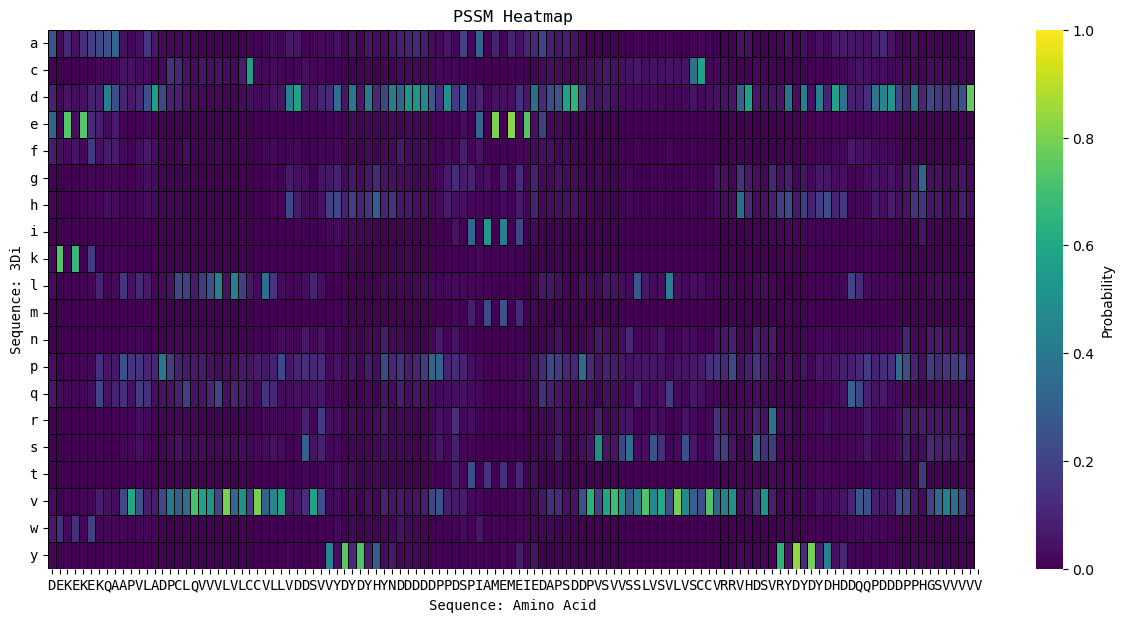

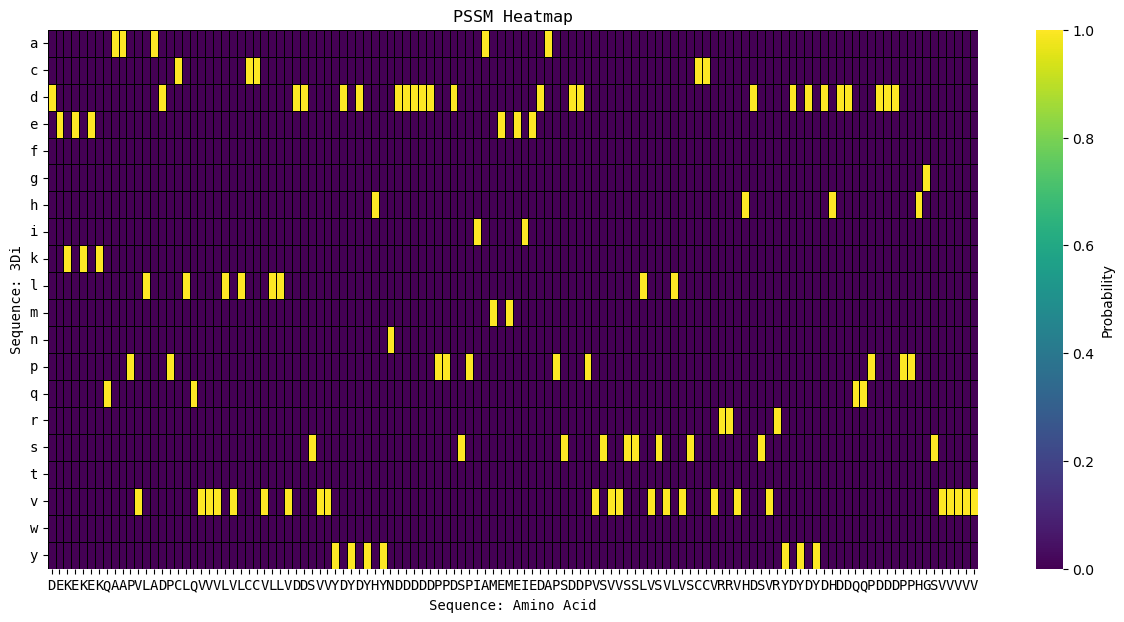

In [72]:
index = 7001
prot_key = list(scope40_sequences.keys())[index]
print(prot_key)
print(scope40_sequences[prot_key])

plot_pssm(pssms_ProstT5[prot_key], scope40_sequences[prot_key])
# plot_pssm(pssms_ProtT5[prot_key], scope40_sequences[prot_key])

seq = scope40_sequences[prot_key]
ohe = np.zeros((len(seq), len(AA_ALPHABET)))

for i, aa in enumerate(seq):
    if aa in AA_ALPHABET:
        ohe[i, AA_ALPHABET.index(aa)] = 1

plot_pssm(ohe, scope40_sequences[prot_key])